## Un système de recommandation : 
Est une application d'intelligence artificielle qui a pour objectif de fournir des suggestions pertinentes aux utilisateurs en se basant sur leurs préférences, leur historique ou d'autres données contextuelles. Ces systèmes sont couramment utilisés dans des domaines tels que le e-commerce, le streaming vidéo ou audio, et les réseaux sociaux.

## 1.Filtrage Collaboratif :
Utilise les interactions des utilisateurs pour recommander des éléments similaires.
Approche courante : baser les recommandations sur les utilisateurs similaires ou les éléments similaires.
Exemple : Les utilisateurs qui ont acheté ce produit ont également acheté…
## 2. Filtrage Basé sur le Contenu :
Analyse les attributs des éléments (mots-clés, catégories, etc.) pour recommander des articles similaires à ce que l'utilisateur aime.
Exemple : Vous avez regardé un film d'action, voici d'autres films d'action.
## 3.Hybride :
Combine les approches de filtrage collaboratif et basé sur le contenu pour des recommandations plus robustes.
Systèmes Basés sur la Popularité :
Recommande les éléments les plus populaires à tous les utilisateurs.
Simple mais peu personnalisé

In [55]:
## importation des bibliotheques neccessaire pour le projet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

## 1. data ingestion

In [2]:
data=pd.read_csv(r"C:\Users\tmp_bilivogui05\Desktop\Projet_IA_recommandation_service\movies.csv")

In [3]:
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
# Vérification des valeurs manquantes
data.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
data.shape

(7668, 15)

## Étape 2 : Data Cleaning

In [6]:
data['released']

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [7]:
## Creation de nouvelles colonnes en utilisant la colonne released
data[['date_released', 'country_released']] = data['released'].str.split(' \(', expand=True) ## suprime la parenthese ouvrante
data['country_released'] = data['country_released'].str.replace(r'\)', '', regex=True)

In [8]:
data[['released','country_released','date_released']].dtypes

released            object
country_released    object
date_released       object
dtype: object

In [9]:
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released,country_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,"October 23, 2020",United States
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,"February 7, 2020",United States
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,"April 27, 2020",Cameroon
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,"October 1, 2020",United States


In [10]:
data.drop(['date_released','released'],axis=1,inplace=True)

In [11]:
data.dtypes

name                 object
rating               object
genre                object
year                  int64
score               float64
votes               float64
director             object
writer               object
star                 object
country              object
budget              float64
gross               float64
company              object
runtime             float64
country_released     object
dtype: object

In [12]:
## Conversion de la colonne year en string
data['year']=data['year'].astype('str')

In [13]:
data.dtypes

name                 object
rating               object
genre                object
year                 object
score               float64
votes               float64
director             object
writer               object
star                 object
country              object
budget              float64
gross               float64
company              object
runtime             float64
country_released     object
dtype: object

In [14]:
data

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,country_released
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,United States
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,United States
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,Cameroon
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,United States


In [15]:
data.isnull().sum()

name                   0
rating                77
genre                  0
year                   0
score                  3
votes                  3
director               0
writer                 3
star                   1
country                3
budget              2171
gross                189
company               17
runtime                4
country_released       2
dtype: int64

In [16]:
data.dropna(inplace=True)

In [17]:
data.isnull().sum()

name                0
rating              0
genre               0
year                0
score               0
votes               0
director            0
writer              0
star                0
country             0
budget              0
gross               0
company             0
runtime             0
country_released    0
dtype: int64

In [18]:
data.shape

(5421, 15)

### Étape 3 : Data Selection

In [19]:
df=data[['name','genre','year','company','country_released','star','director']]

## Étape 4 : Data mining

Text(0.5, 1.0, 'Distribution des scores des films')

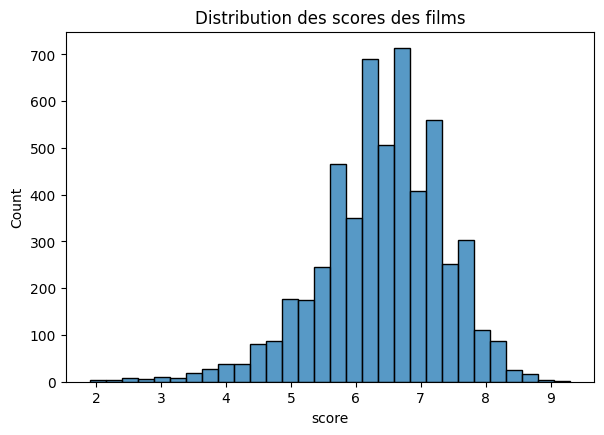

In [20]:
# Distribution de score 
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='score', bins=30)
plt.title('Distribution des scores des films')

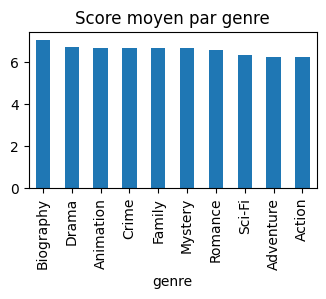

In [22]:
# Top genres par score moyen
plt.subplot(2, 2, 4)
data.groupby('genre')['score'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Score moyen par genre')
plt.tight_layout()
plt.show()

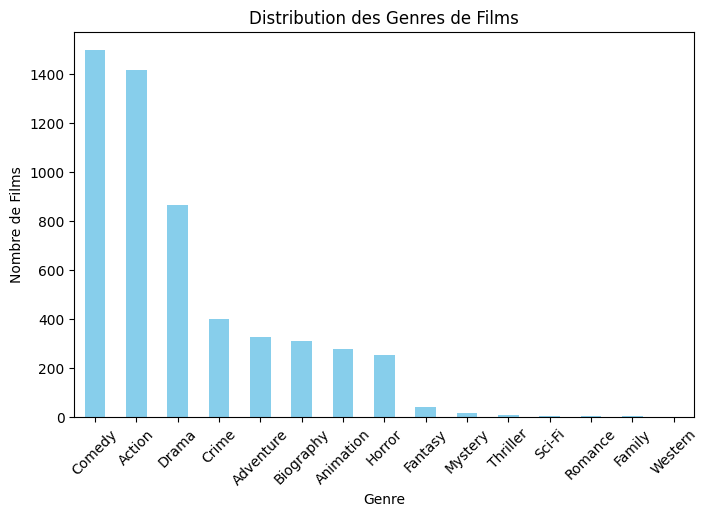

In [44]:
## Distribution des genres de films (genre)
df['genre'].value_counts().plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Distribution des Genres de Films')
plt.xlabel('Genre')
plt.ylabel('Nombre de Films')
plt.xticks(rotation=45)
plt.show()

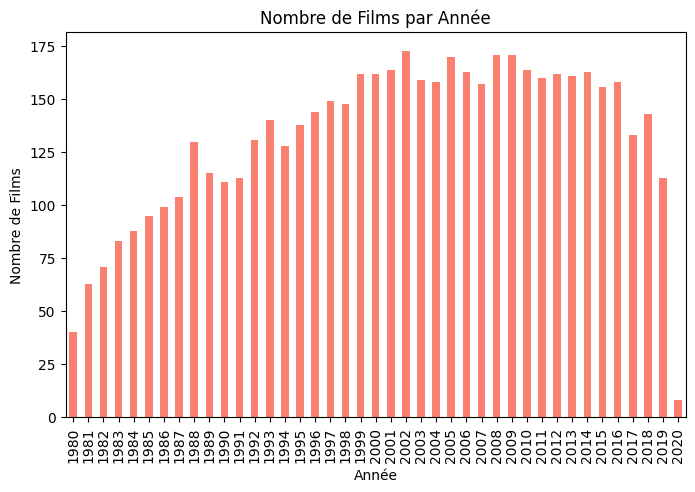

In [45]:
##Nombre de films par année (year) 
df['year'].value_counts().sort_index().plot(kind='bar', color='salmon', figsize=(8, 5))
plt.title('Nombre de Films par Année')
plt.xlabel('Année')
plt.ylabel('Nombre de Films')
plt.show()

In [48]:
df

,name,genre,year,company,country_released,star,director,cat_feature
0,The Shining,Drama,1980,Warner Bros.,United States,Jack Nicholson,Stanley Kubrick,The Shining Drama 1980 Warner Bros. United Sta...
1,The Blue Lagoon,Adventure,1980,Columbia Pictures,United States,Brooke Shields,Randal Kleiser,The Blue Lagoon Adventure 1980 Columbia Pictur...
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,Lucasfilm,United States,Mark Hamill,Irvin Kershner,Star Wars: Episode V - The Empire Strikes Back...
3,Airplane!,Comedy,1980,Paramount Pictures,United States,Robert Hays,Jim Abrahams,Airplane! Comedy 1980 Paramount Pictures Unite...
4,Caddyshack,Comedy,1980,Orion Pictures,United States,Chevy Chase,Harold Ramis,Caddyshack Comedy 1980 Orion Pictures United S...
...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,Action,2020,Columbia Pictures,United States,Will Smith,Adil El Arbi,Bad Boys for Life Action 2020 Columbia Picture...
7649,Sonic the Hedgehog,Action,2020,Paramount Pictures,United States,Ben Schwartz,Jeff Fowler,Sonic the Hedgehog Action 2020 Paramount Pictu...
7650,Dolittle,Adventure,2020,Universal Pictures,United States,Robert Downey Jr.,Stephen Gaghan,Dolittle Adventure 2020 Universal Pictures Uni...
7651,The Call of the Wild,Adventure,2020,20th Century Studios,United States,Harrison Ford,Chris Sanders,The Call of the Wild Adventure 2020 20th Centu...


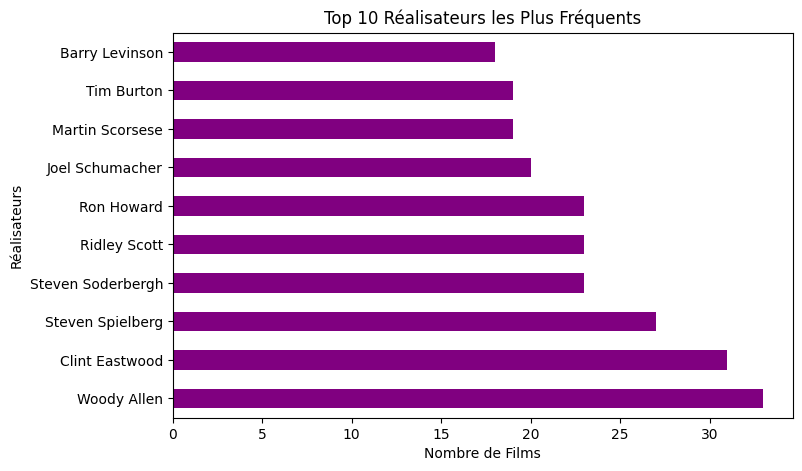

In [50]:
## Les réalisateurs les plus fréquents (director)
df['director'].value_counts().head(10).plot(kind='barh', color='purple', figsize=(8, 5))
plt.title('Top 10 Réalisateurs les Plus Fréquents')
plt.xlabel('Nombre de Films')
plt.ylabel('Réalisateurs')
plt.show()

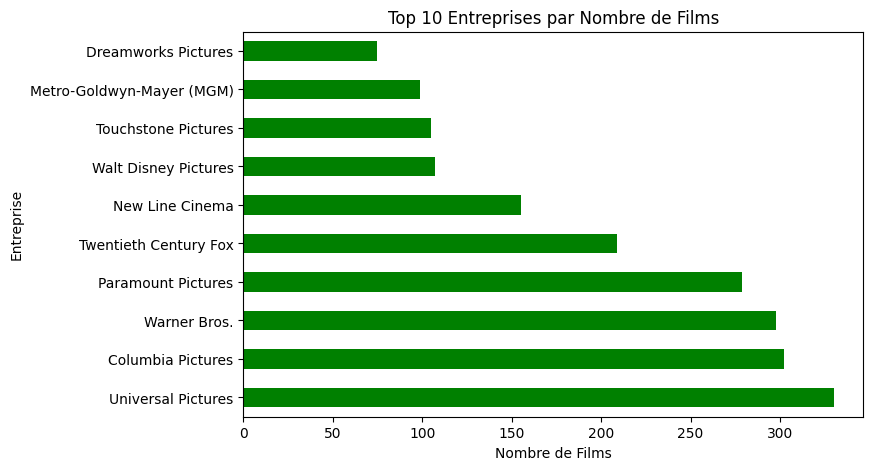

In [51]:
#Nombre de films par entreprise (company) 
df['company'].value_counts().head(10).plot(kind='barh', color='green', figsize=(8, 5))
plt.title('Top 10 Entreprises par Nombre de Films')
plt.xlabel('Nombre de Films')
plt.ylabel('Entreprise')
plt.show()

### Étape 5 : Data Transformation

In [24]:
## La vectorisation de la colonne 'cat_feature'
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer=CountVectorizer(stop_words='english',min_df=20)
#matrix=vectorizer.fit_transform(df['cat_feature'])

In [25]:
df

,name,genre,year,company,country_released,star,director
0,The Shining,Drama,1980,Warner Bros.,United States,Jack Nicholson,Stanley Kubrick
1,The Blue Lagoon,Adventure,1980,Columbia Pictures,United States,Brooke Shields,Randal Kleiser
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,Lucasfilm,United States,Mark Hamill,Irvin Kershner
3,Airplane!,Comedy,1980,Paramount Pictures,United States,Robert Hays,Jim Abrahams
4,Caddyshack,Comedy,1980,Orion Pictures,United States,Chevy Chase,Harold Ramis
...,...,...,...,...,...,...,...
7648,Bad Boys for Life,Action,2020,Columbia Pictures,United States,Will Smith,Adil El Arbi
7649,Sonic the Hedgehog,Action,2020,Paramount Pictures,United States,Ben Schwartz,Jeff Fowler
7650,Dolittle,Adventure,2020,Universal Pictures,United States,Robert Downey Jr.,Stephen Gaghan
7651,The Call of the Wild,Adventure,2020,20th Century Studios,United States,Harrison Ford,Chris Sanders


In [26]:
## Creation de la colonne 'cat_feature'
df['cat_feature']=df[df.columns].apply(lambda x :' '.join(x),axis=1)

C:\Users\tmp_bilivogui05\AppData\Local\Temp\ipykernel_15864\254927591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cat_feature']=df[df.columns].apply(lambda x :' '.join(x),axis=1)


In [27]:
df.isnull().sum()

name                0
genre               0
year                0
company             0
country_released    0
star                0
director            0
cat_feature         0
dtype: int64

In [28]:
## La vectorisation de la colonne 'cat_feature'
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(stop_words='english',min_df=20)
matrix=vectorizer.fit_transform(df['cat_feature'])

In [29]:
vectorizer

CountVectorizer(min_df=20, stop_words='english')

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
sim=cosine_similarity(matrix)

In [31]:
# Afficher la matrice de similarité
sim

array([[1.        , 0.42857143, 0.46291005, ..., 0.26726124, 0.25197632,
        0.37796447],
       [0.42857143, 1.        , 0.46291005, ..., 0.53452248, 0.37796447,
        0.37796447],
       [0.46291005, 0.46291005, 1.        , ..., 0.28867513, 0.27216553,
        0.61237244],
       ...,
       [0.26726124, 0.53452248, 0.28867513, ..., 1.        , 0.35355339,
        0.35355339],
       [0.25197632, 0.37796447, 0.27216553, ..., 0.35355339, 1.        ,
        0.33333333],
       [0.37796447, 0.37796447, 0.61237244, ..., 0.35355339, 0.33333333,
        1.        ]])

In [59]:
### Enregistrons cette matrice de similarité
np.save('matrix_similarity.npy',sim)

In [60]:
# Fonction pour obtenir des recommandations basées sur la similarité
def get_recommandation(title,sim,df,count=5):
    index=df.index[df['name'].str.lower()==title.lower()]
    if len(index)==0:
        return []
    if index[0]>=len(sim):
        return []
    similarities=list(enumerate(sim[index[0]]))
    recommandations=sorted(similarities,key=lambda x: x[1],reverse=True)
    top_recs=recommandations[1:count+1]
    titles=[]
    for i in range(len(top_recs)):
        if top_recs[i][0] < len(df):
            title=df.iloc[top_recs[i][0]]['name']
            titles.append(title)
    return titles

In [34]:
df

,name,genre,year,company,country_released,star,director,cat_feature
0,The Shining,Drama,1980,Warner Bros.,United States,Jack Nicholson,Stanley Kubrick,The Shining Drama 1980 Warner Bros. United Sta...
1,The Blue Lagoon,Adventure,1980,Columbia Pictures,United States,Brooke Shields,Randal Kleiser,The Blue Lagoon Adventure 1980 Columbia Pictur...
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,Lucasfilm,United States,Mark Hamill,Irvin Kershner,Star Wars: Episode V - The Empire Strikes Back...
3,Airplane!,Comedy,1980,Paramount Pictures,United States,Robert Hays,Jim Abrahams,Airplane! Comedy 1980 Paramount Pictures Unite...
4,Caddyshack,Comedy,1980,Orion Pictures,United States,Chevy Chase,Harold Ramis,Caddyshack Comedy 1980 Orion Pictures United S...
...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,Action,2020,Columbia Pictures,United States,Will Smith,Adil El Arbi,Bad Boys for Life Action 2020 Columbia Picture...
7649,Sonic the Hedgehog,Action,2020,Paramount Pictures,United States,Ben Schwartz,Jeff Fowler,Sonic the Hedgehog Action 2020 Paramount Pictu...
7650,Dolittle,Adventure,2020,Universal Pictures,United States,Robert Downey Jr.,Stephen Gaghan,Dolittle Adventure 2020 Universal Pictures Uni...
7651,The Call of the Wild,Adventure,2020,20th Century Studios,United States,Harrison Ford,Chris Sanders,The Call of the Wild Adventure 2020 20th Centu...


In [64]:
get_recommandation(title="The Shining",df=df,sim=sim,count=10)

['Purple Rain', 'In Country', 'Dreams', 'North Country', 'August Rush']

In [36]:
df[df['name']=='Thief']

,name,genre,year,company,country_released,star,director,cat_feature
106,Thief,Action,1981,Mann/Caan Productions,United States,James Caan,Michael Mann,Thief Action 1981 Mann/Caan Productions United...


In [37]:
df

,name,genre,year,company,country_released,star,director,cat_feature
0,The Shining,Drama,1980,Warner Bros.,United States,Jack Nicholson,Stanley Kubrick,The Shining Drama 1980 Warner Bros. United Sta...
1,The Blue Lagoon,Adventure,1980,Columbia Pictures,United States,Brooke Shields,Randal Kleiser,The Blue Lagoon Adventure 1980 Columbia Pictur...
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,Lucasfilm,United States,Mark Hamill,Irvin Kershner,Star Wars: Episode V - The Empire Strikes Back...
3,Airplane!,Comedy,1980,Paramount Pictures,United States,Robert Hays,Jim Abrahams,Airplane! Comedy 1980 Paramount Pictures Unite...
4,Caddyshack,Comedy,1980,Orion Pictures,United States,Chevy Chase,Harold Ramis,Caddyshack Comedy 1980 Orion Pictures United S...
...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,Action,2020,Columbia Pictures,United States,Will Smith,Adil El Arbi,Bad Boys for Life Action 2020 Columbia Picture...
7649,Sonic the Hedgehog,Action,2020,Paramount Pictures,United States,Ben Schwartz,Jeff Fowler,Sonic the Hedgehog Action 2020 Paramount Pictu...
7650,Dolittle,Adventure,2020,Universal Pictures,United States,Robert Downey Jr.,Stephen Gaghan,Dolittle Adventure 2020 Universal Pictures Uni...
7651,The Call of the Wild,Adventure,2020,20th Century Studios,United States,Harrison Ford,Chris Sanders,The Call of the Wild Adventure 2020 20th Centu...
